The following code will take a list of IPs and use a database to find from which country the IP originates. The list of IPs used here (called 'ip.txt') is taken from a list of known malicious addresses (http://www.malwaredomainlist.com/forums/index.php?topic=3270.0). The database referencing countries by IP addresses is downloaded from (https://dev.maxmind.com/geoip/legacy/geolite/).

First we import some necessary packages. 'pygeoip' is a package that runs in tandem with the database we downloaded, and helps to reference the entries inside. 'os' is to allow us to navigate directories and find necessary files without leaving python. 'csv' is needed to correctly handle the text file and read it into a workable format.

Please change the argument of the os.chdir command to read the location of the files on your machine, so that the rest of the code will be able to access them correctly:

In [1]:
import pygeoip
import os
import csv
os.chdir('/home/sharding/Documents/DataScienceToolbox/Task1/new/DataScienceFirstProject-master')

Our next step is to reference the database using the package we have downloaded, and assign this to a variable (in this case 'gi'). We also tell the program to locate the text file containing the malicious IPs, and read them out in csv format. 

In [2]:
gi = pygeoip.GeoIP('GeoIP.dat')
os.getcwd()
with open('ip.txt', 'r') as f:
    reader = csv.reader(f)
    IPList=list(reader)
print(IPList[0:10])

[['103.14.120.121'], ['103.19.89.55'], ['103.224.212.222'], ['103.24.13.91'], ['103.31.186.207'], ['103.31.186.29'], ['103.4.16.91'], ['103.4.218.22'], ['103.6.196.156'], ['103.8.127.189']]


The first few values in the list are shown. It turns out that this list is not particularly nice to work with, as it is a "list of lists" so to speak. The individual IPs will be a lot easier to reference later on if they are all in a single list without the need for individual lists to hold each datum. The following code acomplishes this, simply be defining an empty list and add in each data point in sequentially:

In [3]:
IPListAdjusted=[]
for i in range(0,len(IPList),1):
    IPListAdjusted.append(IPList[i][0])
print(IPListAdjusted[0:10])

['103.14.120.121', '103.19.89.55', '103.224.212.222', '103.24.13.91', '103.31.186.207', '103.31.186.29', '103.4.16.91', '103.4.218.22', '103.6.196.156', '103.8.127.189']


Again, the first few entries in the new list are shown, and it is clear to see that this process leaves the IP list in a much nicer format, since continuous double referencing of lists is no longer required. The next part of the code again creates a blank list, but this time it sequentially adds in the countries from which the above IPs originate. This information is found by referencing the database which we downloaded, through the 'gi' command. The first 25 IPs in the list are shown, followed by the first 25 values in the country list.

In [4]:
IPCountryName=[]
for i in range(0,len(IPListAdjusted),1):
    IPCountryName.append(gi.country_name_by_addr(IPListAdjusted[i]))
print(IPListAdjusted[0:25])
print(IPCountryName[0:25])

['103.14.120.121', '103.19.89.55', '103.224.212.222', '103.24.13.91', '103.31.186.207', '103.31.186.29', '103.4.16.91', '103.4.218.22', '103.6.196.156', '103.8.127.189', '103.8.127.205', '104.152.215.90', '104.200.67.194', '104.245.239.7', '104.27.163.228', '104.28.14.104', '104.28.15.104', '104.31.75.147', '107.161.144.14', '107.180.26.77', '108.162.198.96', '108.162.199.96', '108.168.210.189', '108.179.202.25', '109.163.225.232']
['India', 'India', 'Australia', 'Indonesia', 'Hong Kong', 'Hong Kong', 'Australia', 'Thailand', 'Malaysia', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Romania']


In [5]:
s=( '\n'.join(IPCountryName))
file = open("listofcountries.txt","w")
file.write(s)
file.close()

The function above converts the list of countries into a text file

Although none of the above display this, some of the IPs (particularly near the end of the IP list) return blank country names (''), most likely because the database from which we are referencing the country names is incomplete. These unknown values are largely useless, and it is easy to remove them:

In [6]:
IPCountryNameAdjusted=[x for x in IPCountryName if not x=='']
print("Original IP list of length =")
print(len(IPCountryName))
print("New IP list of length =")
print(len(IPCountryNameAdjusted))

Original IP list of length =
1003
New IP list of length =
967


From this we can see that a total of 36 data points were removed for being null, which leaves us with about 96% of our original data. This list is currently too long to be of use, so we need some code to be able to analyse it. The following lines produce a frequency chart showing the number of times each country appeared (only the top 25 most frequent are shown):

In [7]:
import pandas as pd
IPCountrySeries=pd.Series(IPCountryNameAdjusted)
counts=IPCountrySeries.value_counts()
print(counts[0:25])

United States         317
Russian Federation     71
Germany                60
France                 53
Netherlands            46
China                  41
United Kingdom         36
Ukraine                36
Italy                  33
Korea, Republic of     26
Canada                 19
Brazil                 16
Poland                 15
Czech Republic         14
Japan                  12
Austria                11
Turkey                 11
Singapore              10
Romania                 8
Spain                   8
Sweden                  8
India                   7
Latvia                  7
Ireland                 6
Luxembourg              5
dtype: int64


It is clear that the US dominates the list, accounting for about 33% of all the malicious IPs. Unfortunately, the data we found gives us no more information than just a list of the IP addresses, so it is difficult to analyse this dataset much further. There is one more thing that the GeoIP database allows us to do: we can narrow our view further and see from which cities within the country the IP addresses are from. For this, I only considered the IPs originating from the US. This was for two reasons, the first being that the US accounted for the greatest proportion of the dataset so I was interested to see if there was any one location within the country with a large amount of malicious IPs, and secondly that the city finder program appeared to have a much larger knowledge of US cities than most other countries (possibly due to the fact that the database was from the US itself). The process of doing this was much the same as before, with an additional line at the start telling the program to only consider US IPs. 

In [8]:
KnownIPs=[x for x in range(0,len(IPCountryName),1) if not IPCountryName[x]=='']
USIPs=[x for x in KnownIPs if IPCountryName[x]=='United States']
gc = pygeoip.GeoIP('GeoLiteCity.dat')
USCities=[]
for i in USIPs:
    USCities.append(gc.record_by_addr(IPListAdjusted[i])["city"])
print(USCities[0:25])

['Cheyenne', 'Lewes', 'New York', None, None, None, None, 'Buffalo', 'Scottsdale', 'Vero Beach', 'Vero Beach', 'Dallas', 'Houston', 'Los Angeles', 'Scottsdale', 'Scottsdale', 'Scottsdale', 'Provo', 'Beltsville', 'Beltsville', None, None, 'Austin', 'Scottsdale', 'Scottsdale']


Now we can repeat the frequency chart with our collection of US cities. The values here are much more spread, with the top four cities being roughly equal in count. I had expected to see mostly the larger and more populous cities such as New York and San Fransisco, but the most common cities here appear to be cities in the south states. This of course does not imply that these cities are home to more malicious IPs accross the board, but only in this very small sample of IPs which have been flagged as dangerous.

In [9]:
IPCitySeries=pd.Series(USCities)
citycounts=IPCitySeries.value_counts()
print(citycounts[0:20])

Scottsdale     26
Houston        23
Provo          22
Dallas         20
Chicago        12
Burlington     12
Los Angeles    10
Phoenix         9
Atlanta         8
Ashburn         8
Las Vegas       5
San Jose        5
Saint Louis     5
Seattle         5
Austin          4
Brea            4
Lansing         4
Orem            3
Newark          3
Boardman        3
dtype: int64


The code below takes the wireshark IP connections and finds the country they correspond to


In [11]:
with open('reducedmyv4IPs.txt', 'r') as f:
    reader = csv.reader(f)
    oIPList=list(reader)
IPListAdjusted=[]
for i in range(1,len(oIPList),1):
    IPListAdjusted.append(oIPList[i][0])
IPCountryName=[]
for i in range(1,len(IPListAdjusted),1):
    IPCountryName.append(gi.country_name_by_addr(IPListAdjusted[i]))
print(IPCountryName[1:20])

['United Kingdom', 'United Kingdom', 'United States', 'United States', 'United States', 'United States', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United States', 'United States', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United States', 'United States']


The function compares two lists. One is the list of the malicious IPs and the other one is list of IPs our computer communicates with. 

In [12]:
def common_data(list1,list2): 
    result = False
  
    # traverse in the 1st list 
    for x in list1: 
  
        # traverse in the 2nd list 
        for y in list2: 
    
            # if one common 
            if x == y: 
                result = True
                return result  
                  
    return result 

In [13]:
common_data(IPList,oIPList)


False

False as a result means that the computer does not communicate with any of the IPs from the list. We should remember that the list of malicious IPs we got is not long enough to say more about security of our network. 

The following code creates a visualization of the countires that appear in the list of malicious IPs. The wordcloud creates a display of associated words, where the relative size is an indication of their frequency in the text.

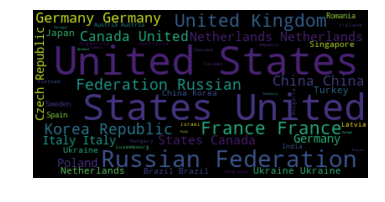

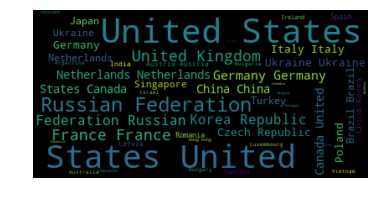

In [19]:
from os import path
from wordcloud import WordCloud

# Read the whole text.
text = open(path.join('listofcountries.txt')).read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As you can see, the code has worked somewhat well. The two generated graphics (the second uses added code to reduce the font size) indeed display the associated countries, and certainly "United States" appears to be the largest, which is what we expected. One obvious misstep is that the program seems to consider strings such as "Unites States" and "States United" as two distinct but relatively equal entries. Many country names appear twice in a similar way.

This is most likely due to how the program is reading the file. For instance, if the program is dealing with a string "United States United States United States..." it likely cannot differentiate between "Unites States" and "States United", and therefore considers them seperately. Unfortunately we ran out of time to try and solve this issue.